In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

In [2]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [3]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


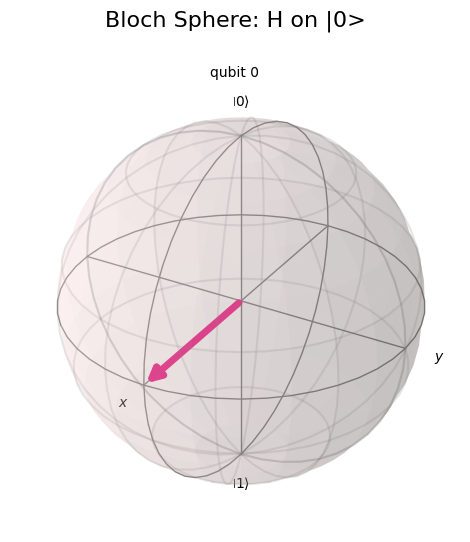

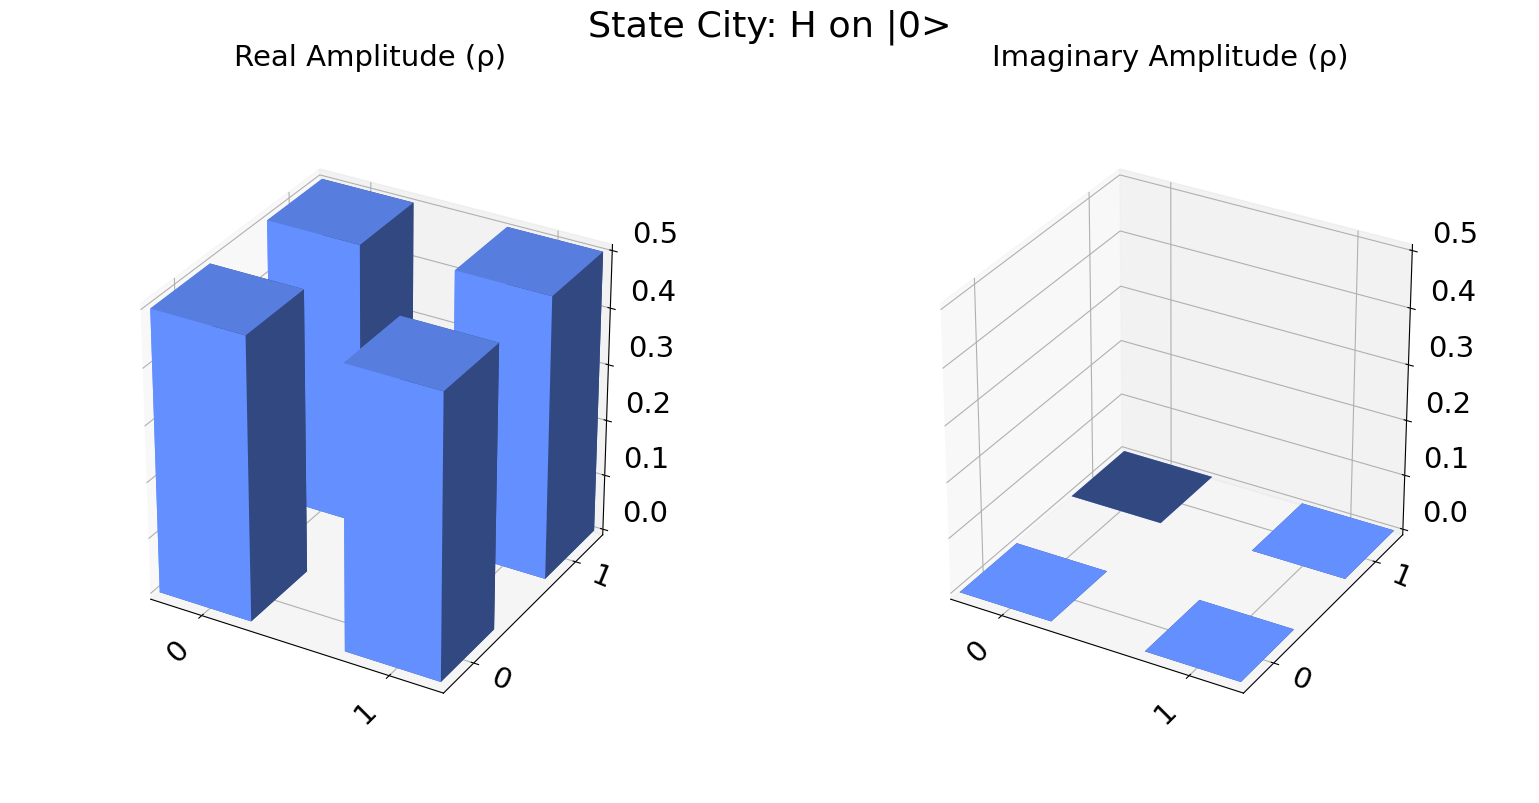

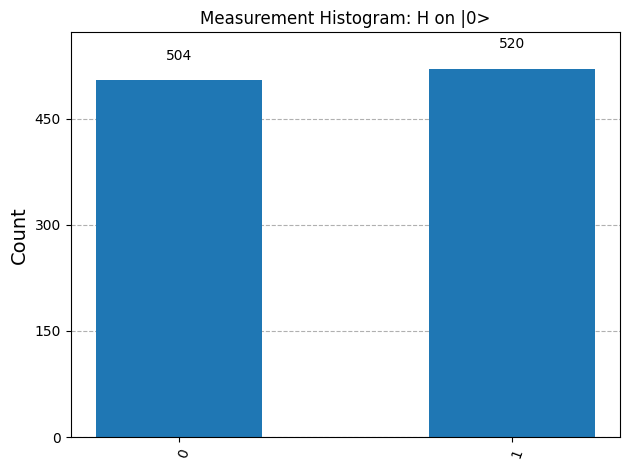



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


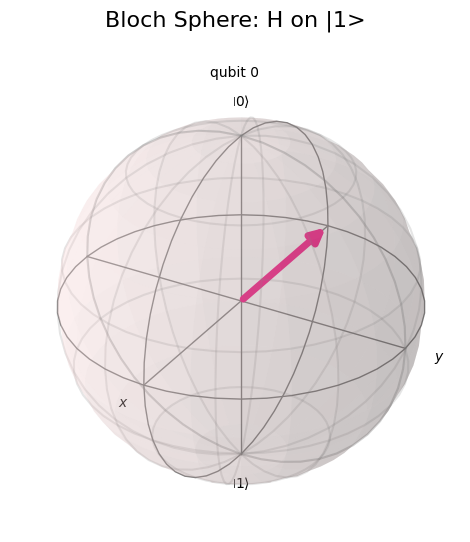

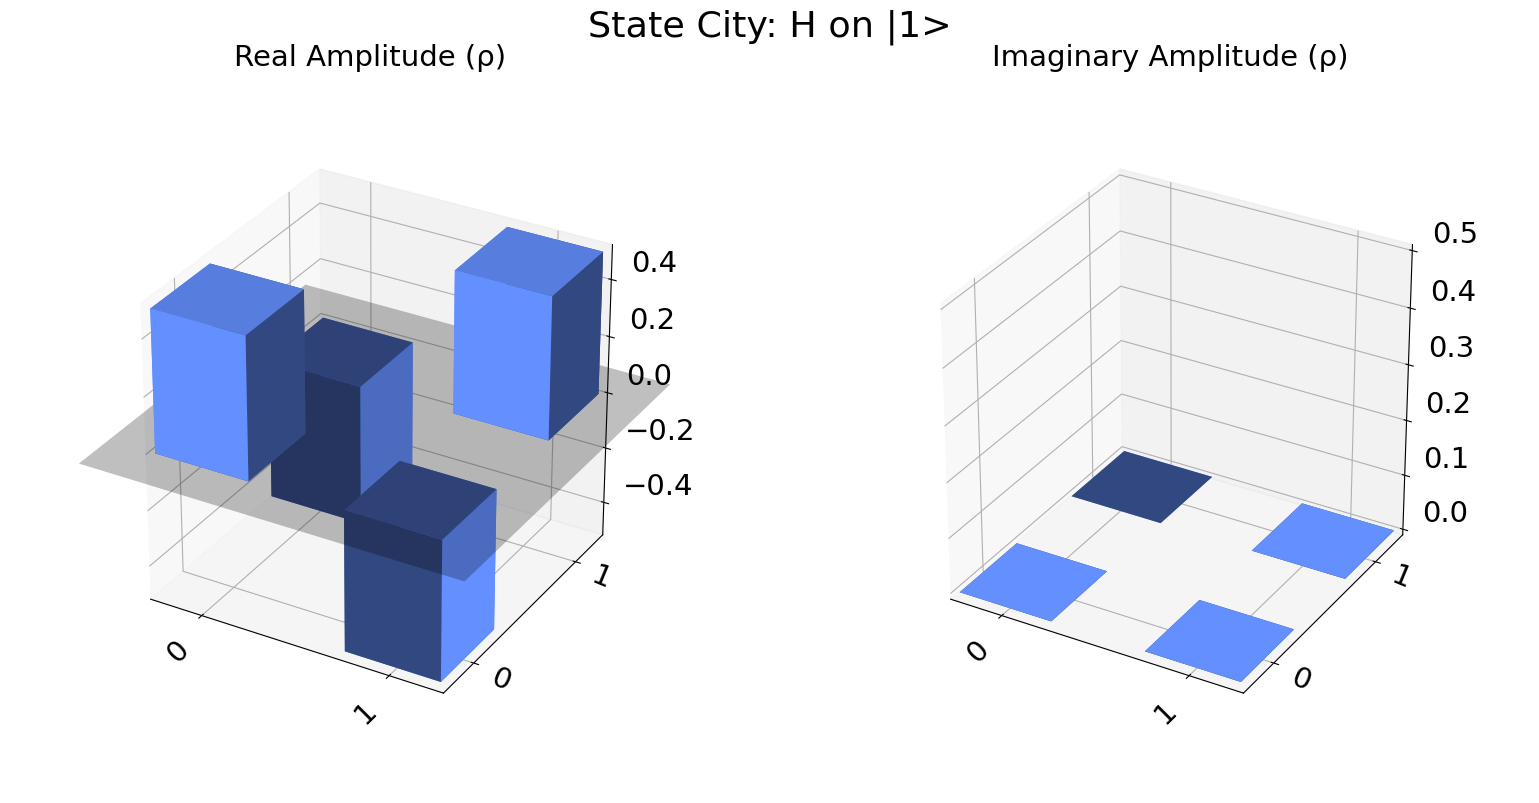

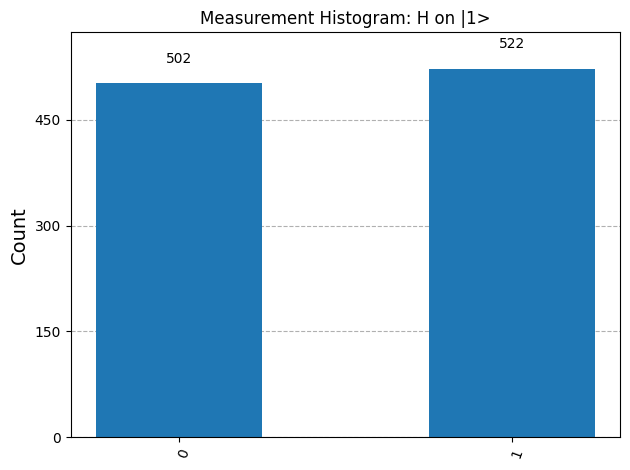



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


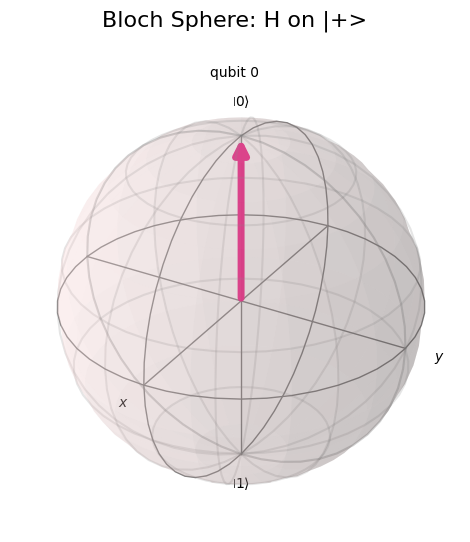

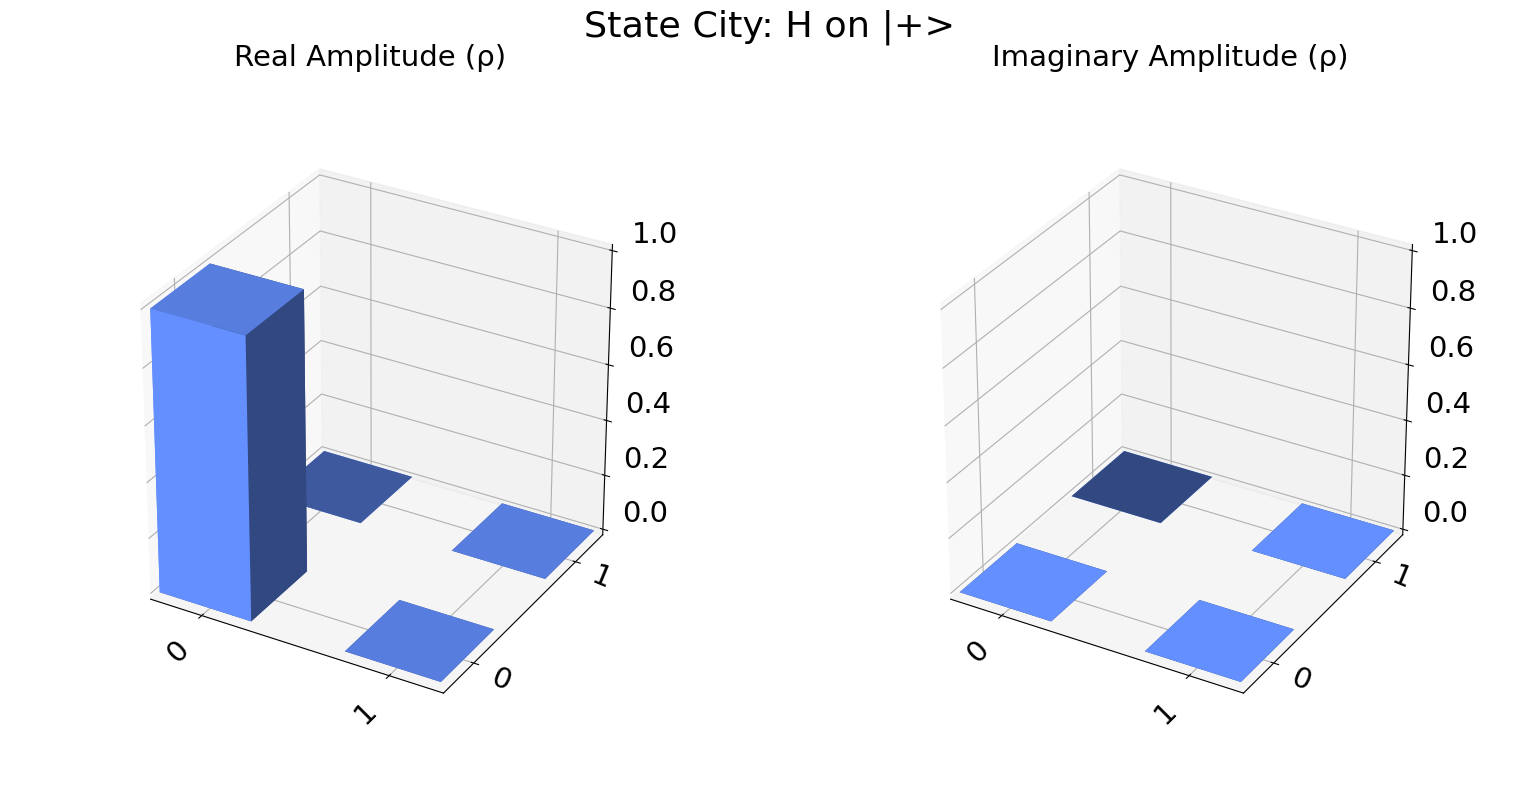

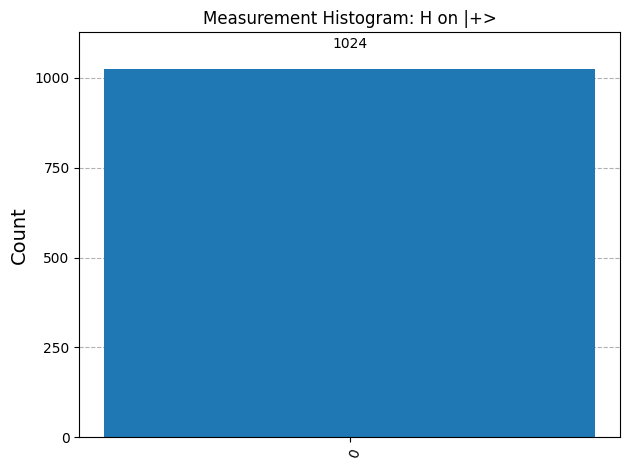



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


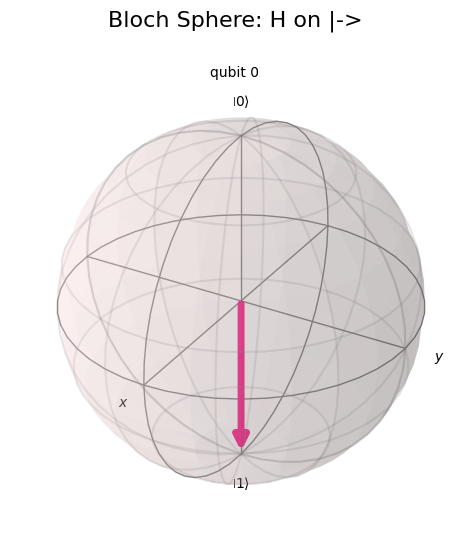

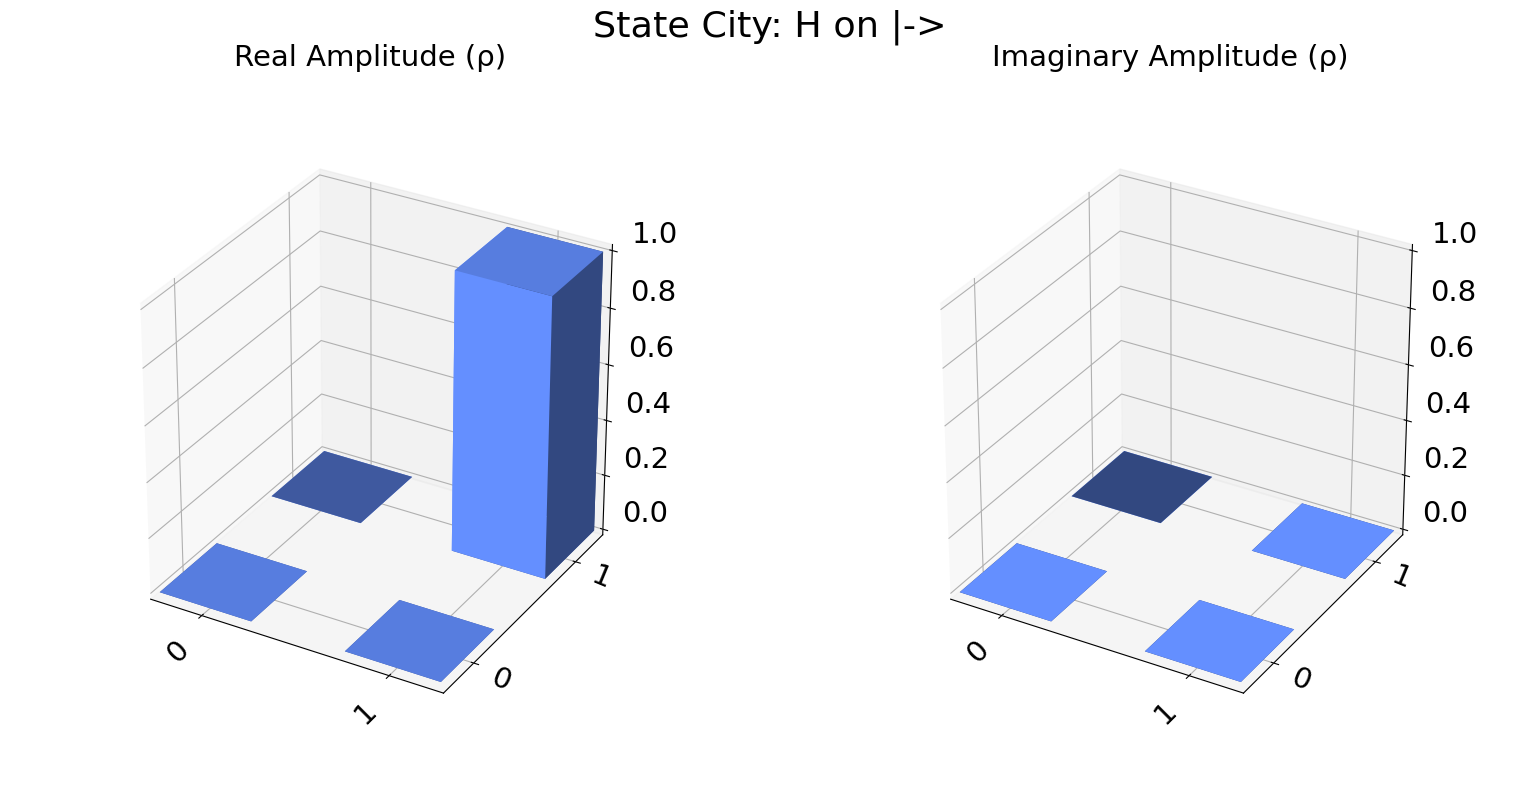

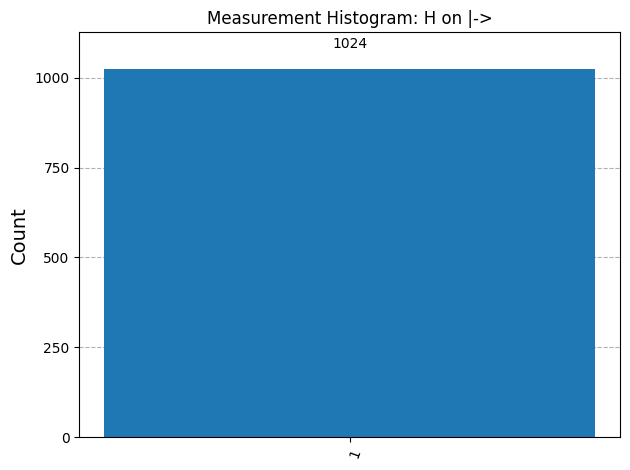

In [4]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


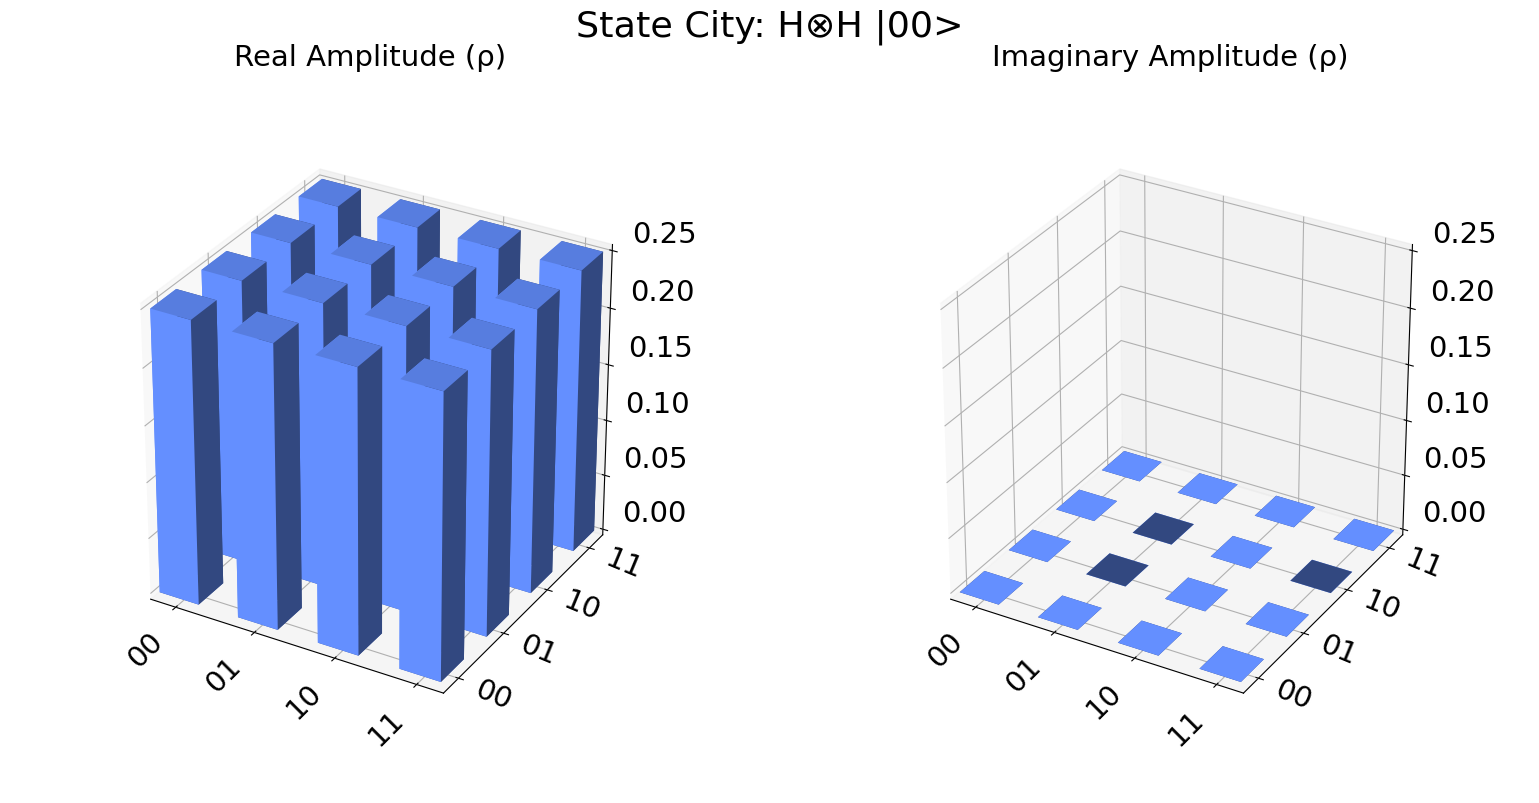

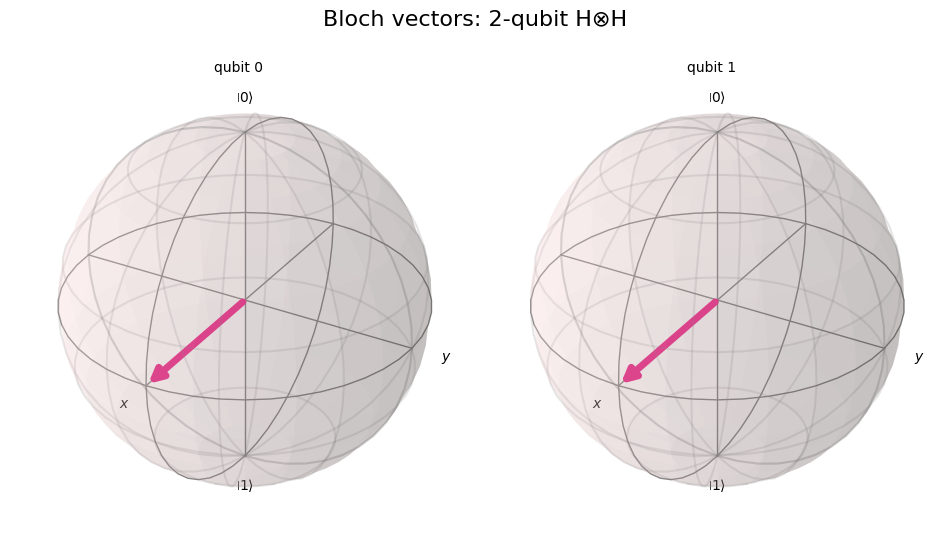

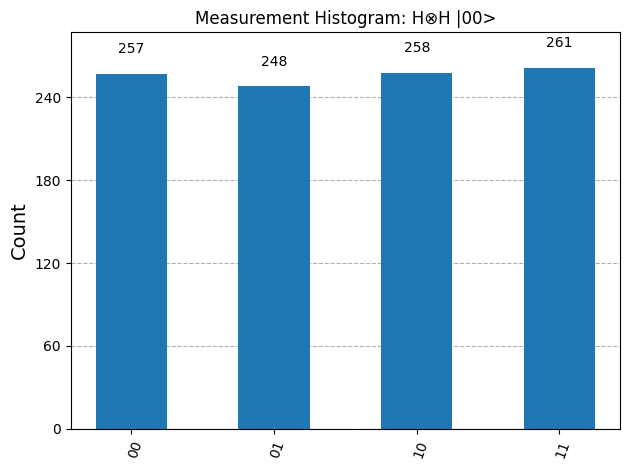


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [5]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


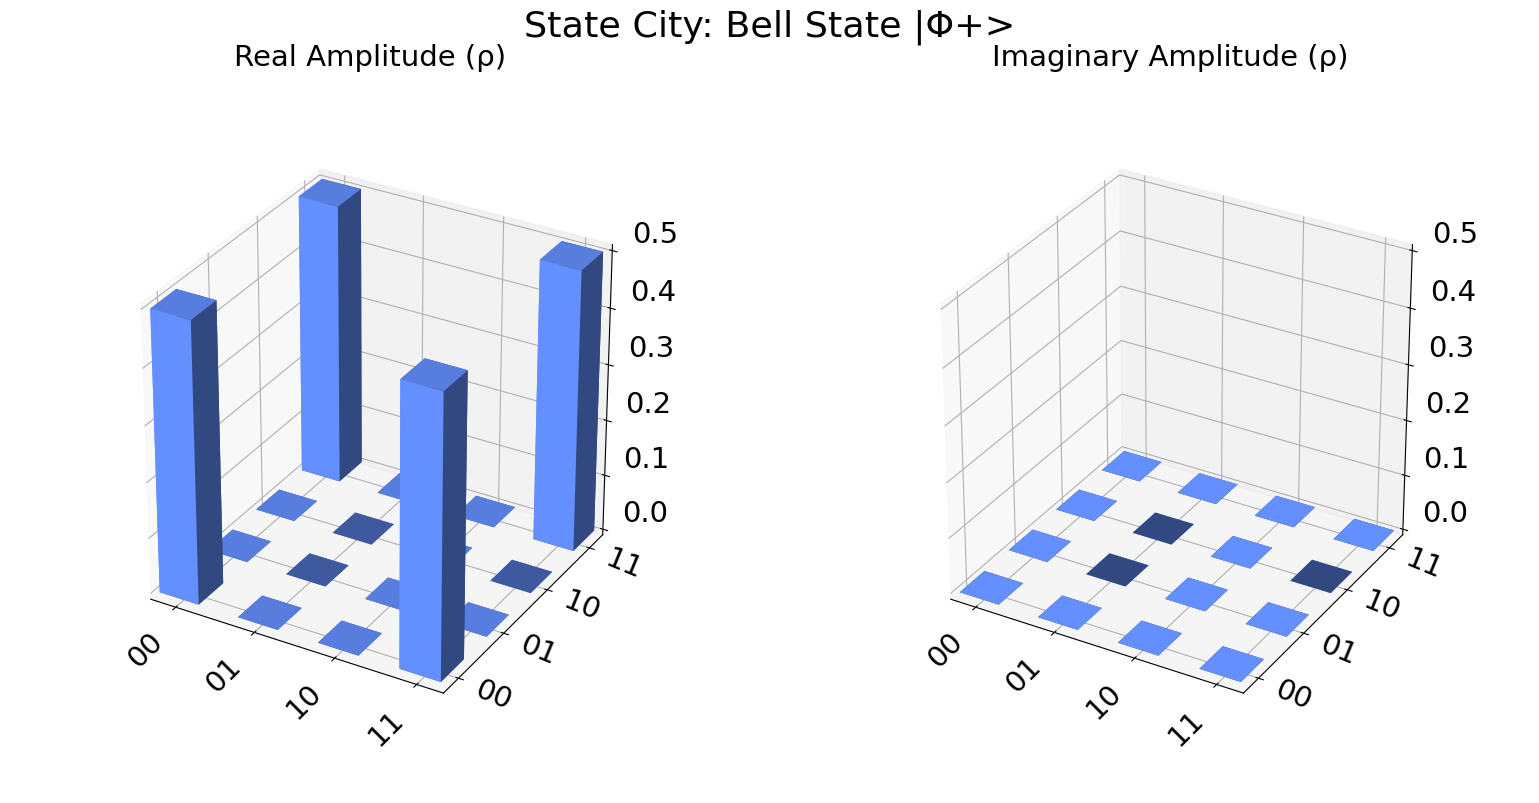

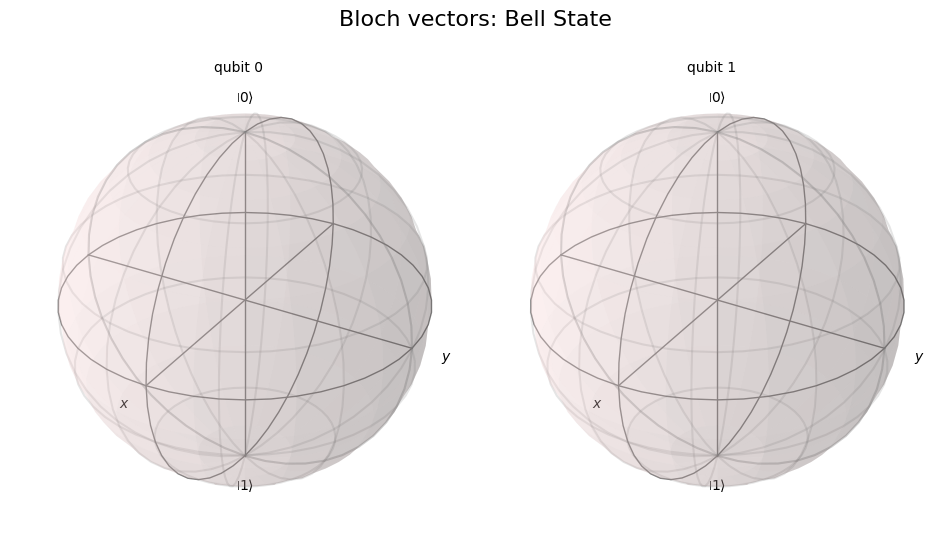

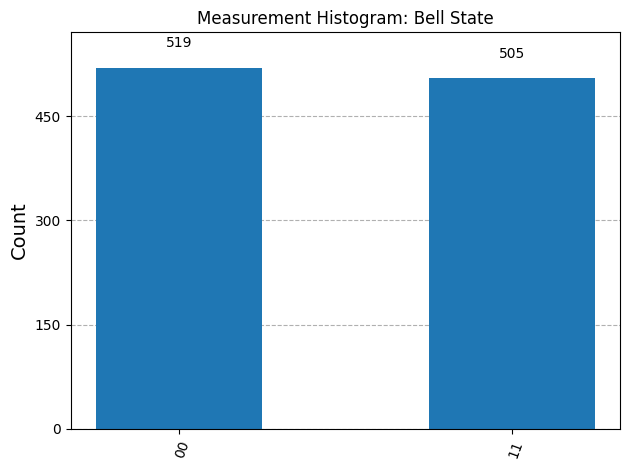


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [6]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


**TASK 1**

In [7]:
# ======================
# TASK 1: HADAMARD ON |0>, |1>, |+>, |->
# ======================
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def hadamard_state(initial_state, label):
    qc = QuantumCircuit(1)
    qc.initialize(initial_state, 0)
    qc.h(0)
    state = Statevector.from_instruction(qc)
    print(f"{label} → After H: {state.data}\n")

# |0>
hadamard_state(np.array([1, 0]), "|0>")
# |1>
hadamard_state(np.array([0, 1]), "|1>")
# |+>
hadamard_state(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
# |->
hadamard_state(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


|0> → After H: [0.70710678+0.j 0.70710678+0.j]

|1> → After H: [ 0.70710678+0.j -0.70710678+0.j]

|+> → After H: [1.+0.j 0.+0.j]

|-> → After H: [0.+0.j 1.+0.j]



**TASK 2**

Statevector for H⊗H⊗H |000>:
 [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


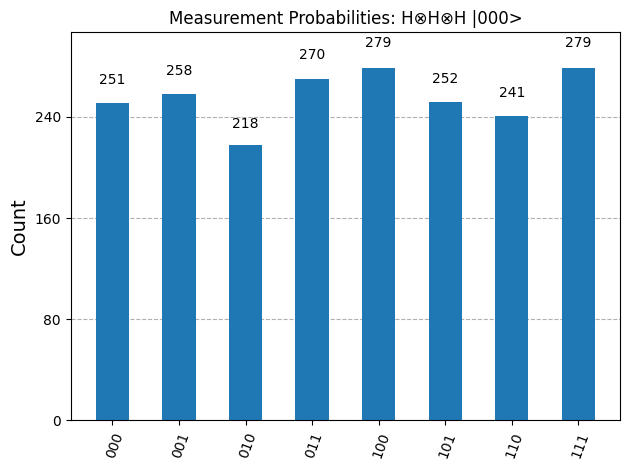


Expected: Equal probabilities for all 8 states.



In [8]:
# ======================
# TASK 2: 3-QUBIT H⊗H⊗H
# ======================
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)
print("Statevector for H⊗H⊗H |000>:\n", state3.data)

# Simulation
sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result = sim.run(qc3_t, shots=2048).result()
counts = result.get_counts()
display(plot_histogram(counts, title="Measurement Probabilities: H⊗H⊗H |000>"))
print("\nExpected: Equal probabilities for all 8 states.\n")


**TASK 3**

GHZ Statevector (|000> + |111>)/√2:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


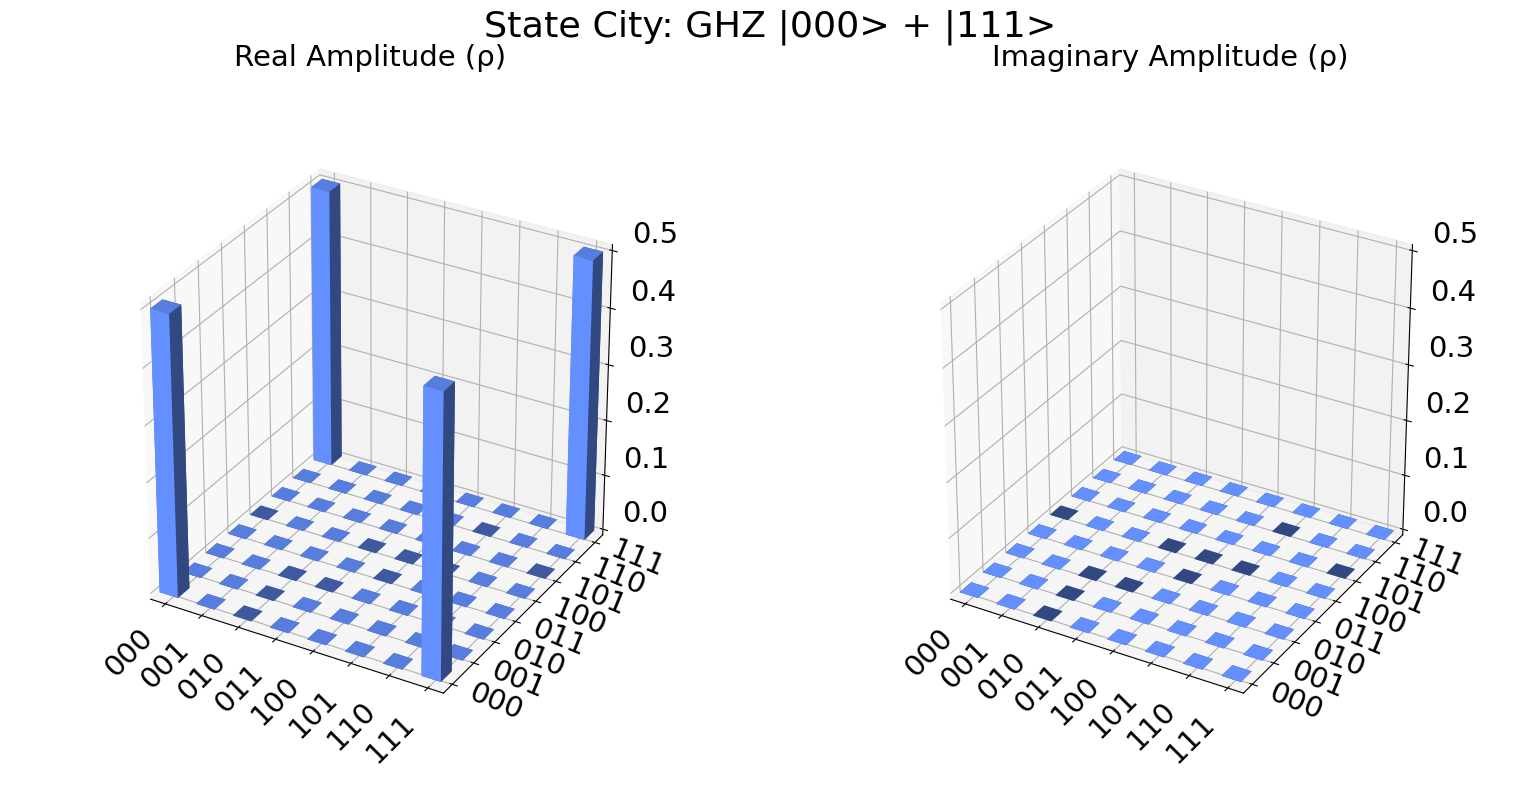

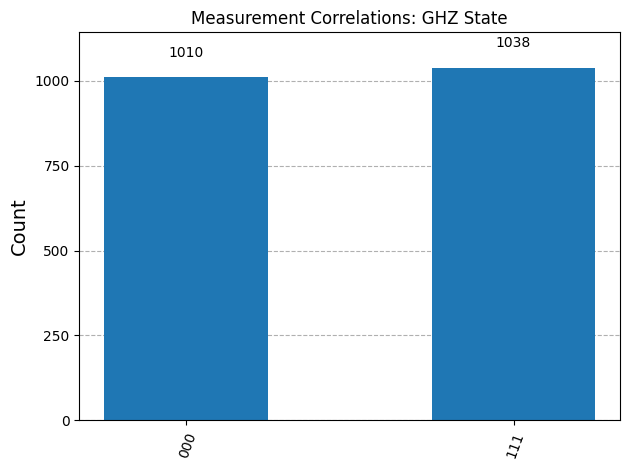


Expected outcomes: |000> and |111> only.



In [9]:
# ======================
# TASK 3: H + CX + CX (GHZ State)
# ======================
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit_aer import AerSimulator

qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(1, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

# Statevector
qc_state = QuantumCircuit(3)
qc_state.h(0)
qc_state.cx(0, 1)
qc_state.cx(1, 2)
state = Statevector.from_instruction(qc_state)
print("GHZ Statevector (|000> + |111>)/√2:\n", state.data)

display(plot_state_city(state, title="State City: GHZ |000> + |111>"))
sim = AerSimulator()
qc_t = transpile(qc_ghz, sim)
result = sim.run(qc_t, shots=2048).result()
counts = result.get_counts()
display(plot_histogram(counts, title="Measurement Correlations: GHZ State"))
print("\nExpected outcomes: |000> and |111> only.\n")


**TASK 4**

In [10]:
# ======================
# TASK 4: H Twice on |1>
# ======================
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.h(0)
qc.h(0)
state = Statevector.from_instruction(qc)

print("After H twice on |1>:\n", state.data)
print("\nExpected: Returns to |1> (since H·H = I).")


After H twice on |1>:
 [0.+0.j 1.+0.j]

Expected: Returns to |1> (since H·H = I).


**TASK 5**

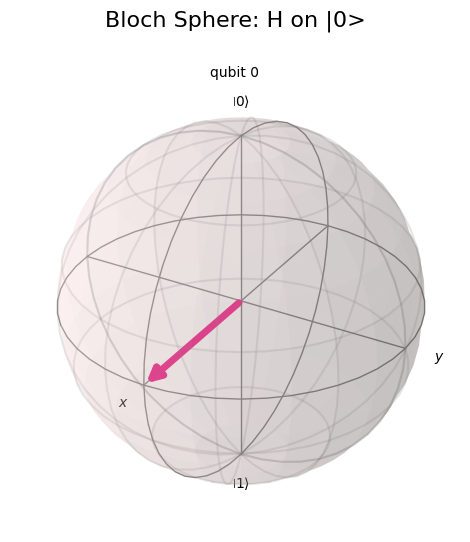

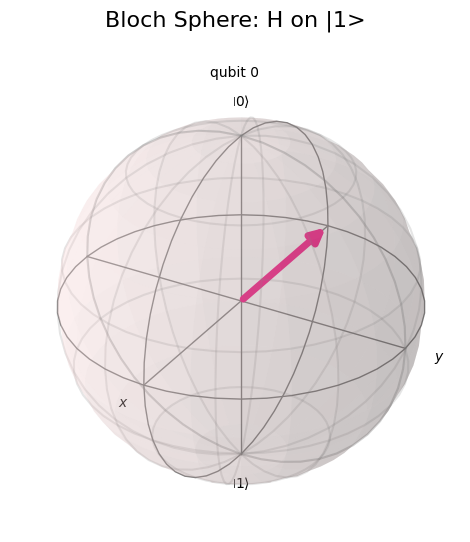

In [11]:
# ======================
# TASK 5: BLOCH SPHERE AFTER H
# ======================
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# |0> initial state
qc = QuantumCircuit(1)
qc.initialize([1, 0], 0)
qc.h(0)
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state, title="Bloch Sphere: H on |0>"))

# |1> initial state
qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.h(0)
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state, title="Bloch Sphere: H on |1>"))
